In [32]:
import numpy as np
import tensorflow as tf
from IPython.core.magics.code import extract_code_ranges
from tensorflow import keras
import matplotlib.pyplot as plt
import math


def plot_samples(data,
                 n=5,
                 max_cols=5,
                 cmap="gray",
                 #cmap="tab20"
                 ):
    n = min(len(data), n)
    if n < max_cols:
        rows = 1
        cols = n
    else:
        rows = math.ceil(n / max_cols)
        cols = max_cols
    print(f"rows: {rows}, cols: {cols}")
    fig, ax = plt.subplots(nrows=rows, ncols=cols, sharex=True, sharey=True, figsize=(20, 10))
    #ax = ax.flatten()
    index = 0
    for i in range(rows):
        for j in range(cols):
            img = data[index]
            index += 1
            #    .numpy().reshape(X.shape[1],X.shape[2],2)
            print()
            ax[i, j].imshow(img, cmap=cmap, interpolation='nearest')
            if index >= n:
                break

    #ax[0].set_xticks([])
    #ax[0].set_yticks([])
    plt.tight_layout()
    # plt.savefig('./figures/mnist_all.png', dpi=300)
    plt.show()


def plot_images(images, nrows=1, ncols=5, cmap='gray', figsize=(20, 10)):
    """
    Plot a list of images using matplotlib subplots.

    Args:
        images (list or np.ndarray): List or array of images to plot.
        nrows (int): Number of rows in the subplot grid.
        ncols (int): Number of columns in the subplot grid.
        cmap (str): Color map for the images (e.g., 'gray', 'viridis').
        figsize (tuple): Tuple specifying the overall figure size (width, height).
    """
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()

    # Iterate through all the subplots
    for i, ax in enumerate(axes):
        if i < len(images):  # Plot if there are images left
            ax.imshow(images[i], cmap=cmap)
            ax.axis('off')  # Turn off axes
        else:  # Turn off any extra axes (used when images < nrows*ncols)
            ax.axis('off')

    plt.tight_layout()
    plt.show()


def show_reconstructions_code(model, images, shape, n_images=5):
    code = model.layers[0].predict(images[:n_images])
    code_images = code.reshape([n_images] + list(shape))
    reconstructed_images = model.layers[1].predict(code)
    # all_images = np.append(images, reconstructed_images, axis=0)
    all_images = [x for x in images[:n_images]]
    all_images.extend(code_images)
    all_images.extend(reconstructed_images)
    plot_images(all_images, nrows=3)


def show_code_reconstructions(decoder, codes, n_images=5, shape=None):
    code_shape = (1, codes.shape[1])
    reconstructions = decoder.predict(codes[:n_images])
    reconstructed_images = reconstructions if shape is None else reconstructions.reshape([n_images] + list(shape))
    all_images = [x.reshape(code_shape) for x in codes]
    all_images.extend(reconstructed_images)
    plot_images(all_images, nrows=2)


def plot_reconstructions(model, images, n_images=5):
    reconstructions = np.clip(model.predict(images[:n_images]), 0, 1)
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index], cmap="binary")
        plt.axis("off")
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstructions[image_index], cmap="binary")
        plt.axis("off")

rows: 4, cols: 5






















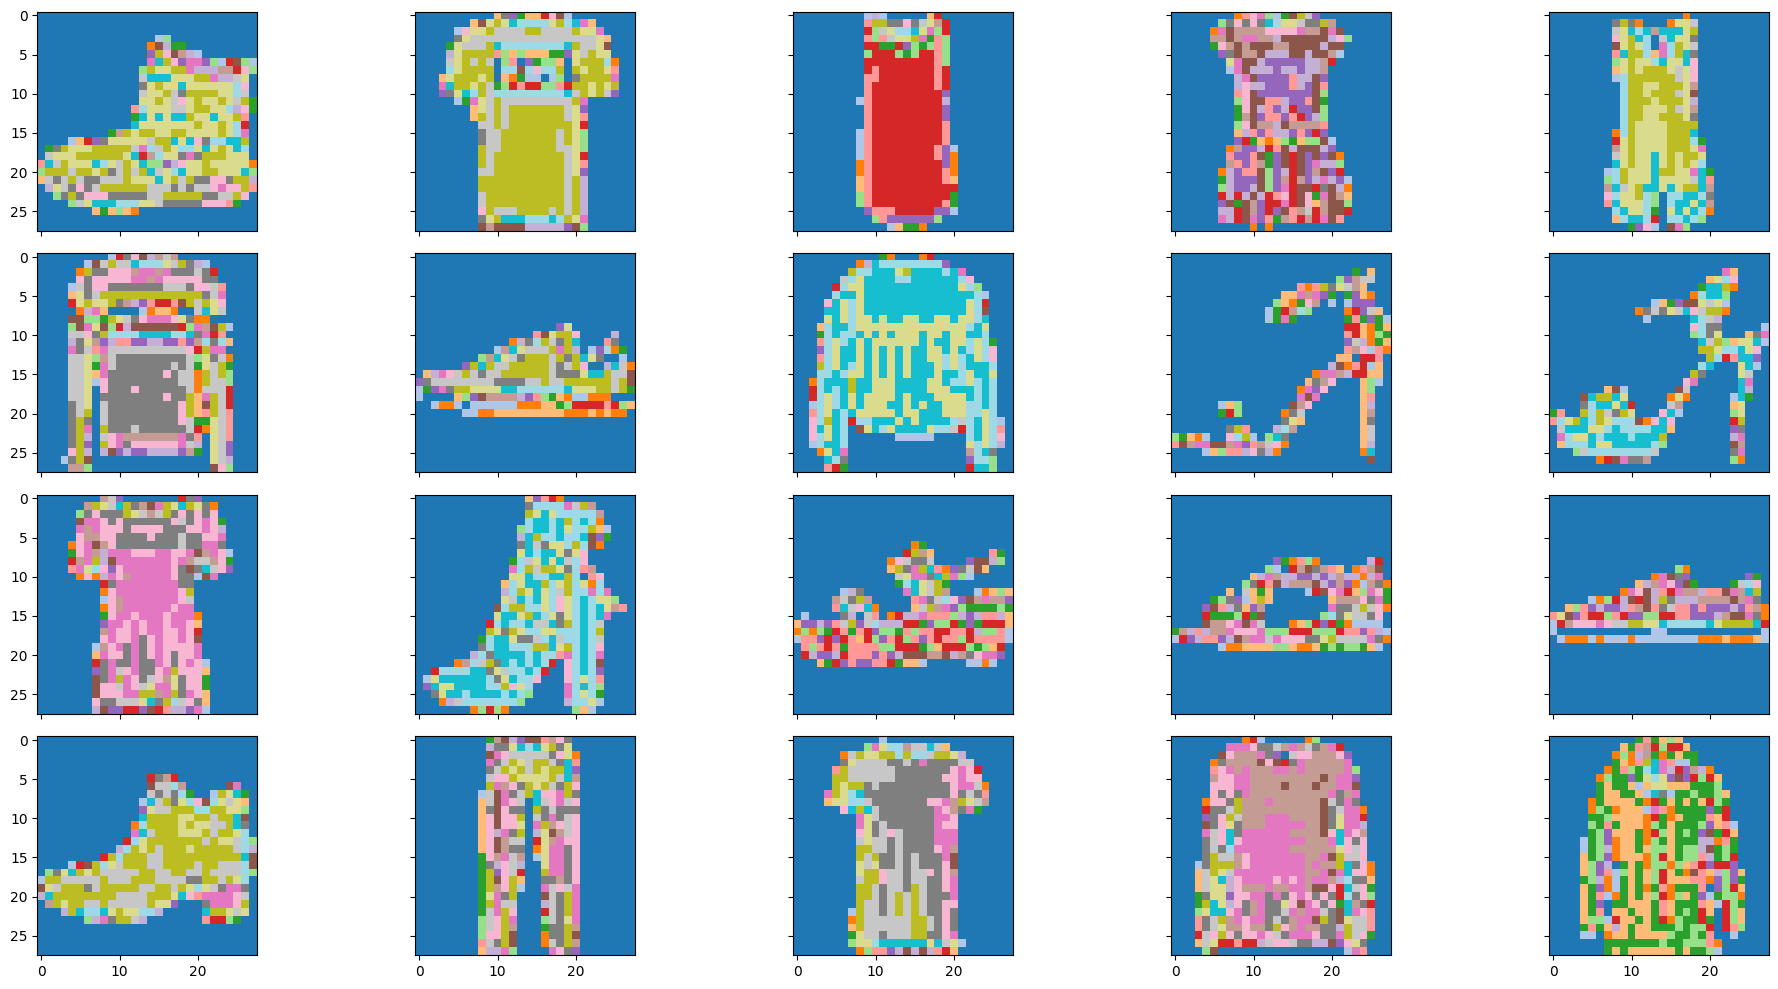

In [2]:
fashion_mnist = keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

plot_samples(X_train, 20)

2025-03-24 18:35:47.763889: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2025-03-24 18:35:47.763931: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2025-03-24 18:35:47.763939: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
I0000 00:00:1742837747.763954 19067808 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1742837747.763975 19067808 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-03-24 18:35:47.921459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


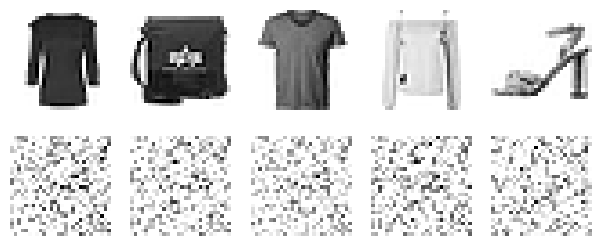

In [4]:
tf.random.set_seed(42)  # extra code – ensures reproducibility on CPU

stacked_encoder = keras.Sequential(
        [
                keras.layers.Flatten(),
                keras.layers.Dense(100, activation="selu"),
                keras.layers.Dense(30, activation="selu"),
                ]
        )
stacked_decoder = keras.Sequential(
        [
                keras.layers.Dense(100, activation="relu"),
                keras.layers.Dense(28 * 28),
                keras.layers.Reshape([28, 28])
                ]
        )
stacked_ae = keras.Sequential([stacked_encoder, stacked_decoder])

stacked_ae.compile(
        loss="binary_crossentropy", optimizer=keras.optimizers.Adam()
        )
plot_reconstructions(stacked_ae, images=X_valid)

Epoch 1/5
430/430 - 5s - 11ms/step - loss: 1.0722 - val_loss: 1.3059
Epoch 2/5
430/430 - 4s - 9ms/step - loss: 1.1988 - val_loss: 1.1708
Epoch 3/5
430/430 - 4s - 9ms/step - loss: 0.9977 - val_loss: 0.8870
Epoch 4/5
430/430 - 4s - 9ms/step - loss: 0.9858 - val_loss: 1.1460
Epoch 5/5
430/430 - 4s - 9ms/step - loss: 1.2093 - val_loss: 1.3399
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


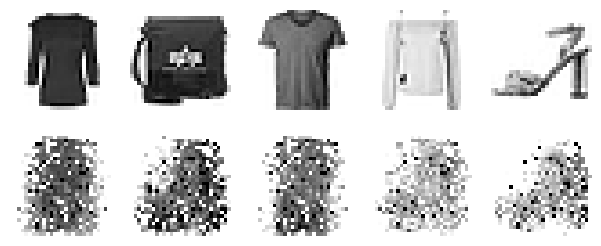

In [5]:
history = stacked_ae.fit(
        X_train, X_train, epochs=5,
        validation_data=(X_valid, X_valid),
        verbose=2,
        batch_size=128
        )
plot_reconstructions(stacked_ae, images=X_valid)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


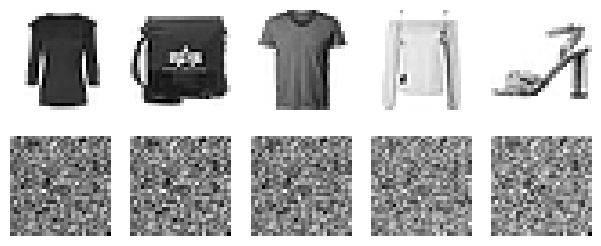

In [31]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))


code_size = 9
stacked_encoder = keras.models.Sequential(
        [
                keras.layers.Input(shape=[28, 28]),
                keras.layers.Flatten(),
                keras.layers.Dense(14 * 14, activation="selu"),
                keras.layers.Dense(code_size, activation="selu"),
                ]
        )
stacked_decoder = keras.models.Sequential(
        [
                keras.layers.Dense(196, activation="selu", input_shape=[code_size]),
                keras.layers.Dense(28 * 28, activation="sigmoid"),
                keras.layers.Reshape([28, 28])
                ]
        )
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
loss = "binary_crossentropy"
stacked_ae.compile(
        loss=loss, optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy]
        )
plot_reconstructions(stacked_ae, images=X_valid)

Epoch 1/10
430/430 - 4s - 10ms/step - loss: 0.3279 - rounded_accuracy: 0.8962 - val_loss: 0.3268 - val_rounded_accuracy: 0.8962
Epoch 2/10
430/430 - 4s - 10ms/step - loss: 0.3220 - rounded_accuracy: 0.9008 - val_loss: 0.3215 - val_rounded_accuracy: 0.9038
Epoch 3/10
430/430 - 4s - 10ms/step - loss: 0.3184 - rounded_accuracy: 0.9035 - val_loss: 0.3187 - val_rounded_accuracy: 0.9059
Epoch 4/10
430/430 - 4s - 9ms/step - loss: 0.3161 - rounded_accuracy: 0.9052 - val_loss: 0.3162 - val_rounded_accuracy: 0.9075
Epoch 5/10
430/430 - 4s - 10ms/step - loss: 0.3144 - rounded_accuracy: 0.9065 - val_loss: 0.3146 - val_rounded_accuracy: 0.9085
Epoch 6/10
430/430 - 4s - 9ms/step - loss: 0.3130 - rounded_accuracy: 0.9074 - val_loss: 0.3133 - val_rounded_accuracy: 0.9092
Epoch 7/10
430/430 - 4s - 9ms/step - loss: 0.3118 - rounded_accuracy: 0.9083 - val_loss: 0.3121 - val_rounded_accuracy: 0.9095
Epoch 8/10
430/430 - 4s - 9ms/step - loss: 0.3109 - rounded_accuracy: 0.9090 - val_loss: 0.3121 - val_round

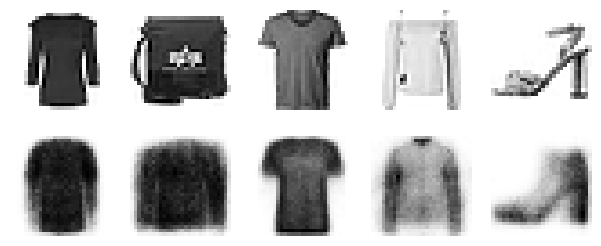

In [35]:
stacked_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid), verbose=2, batch_size=128)
plot_reconstructions(stacked_ae, images=X_valid)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


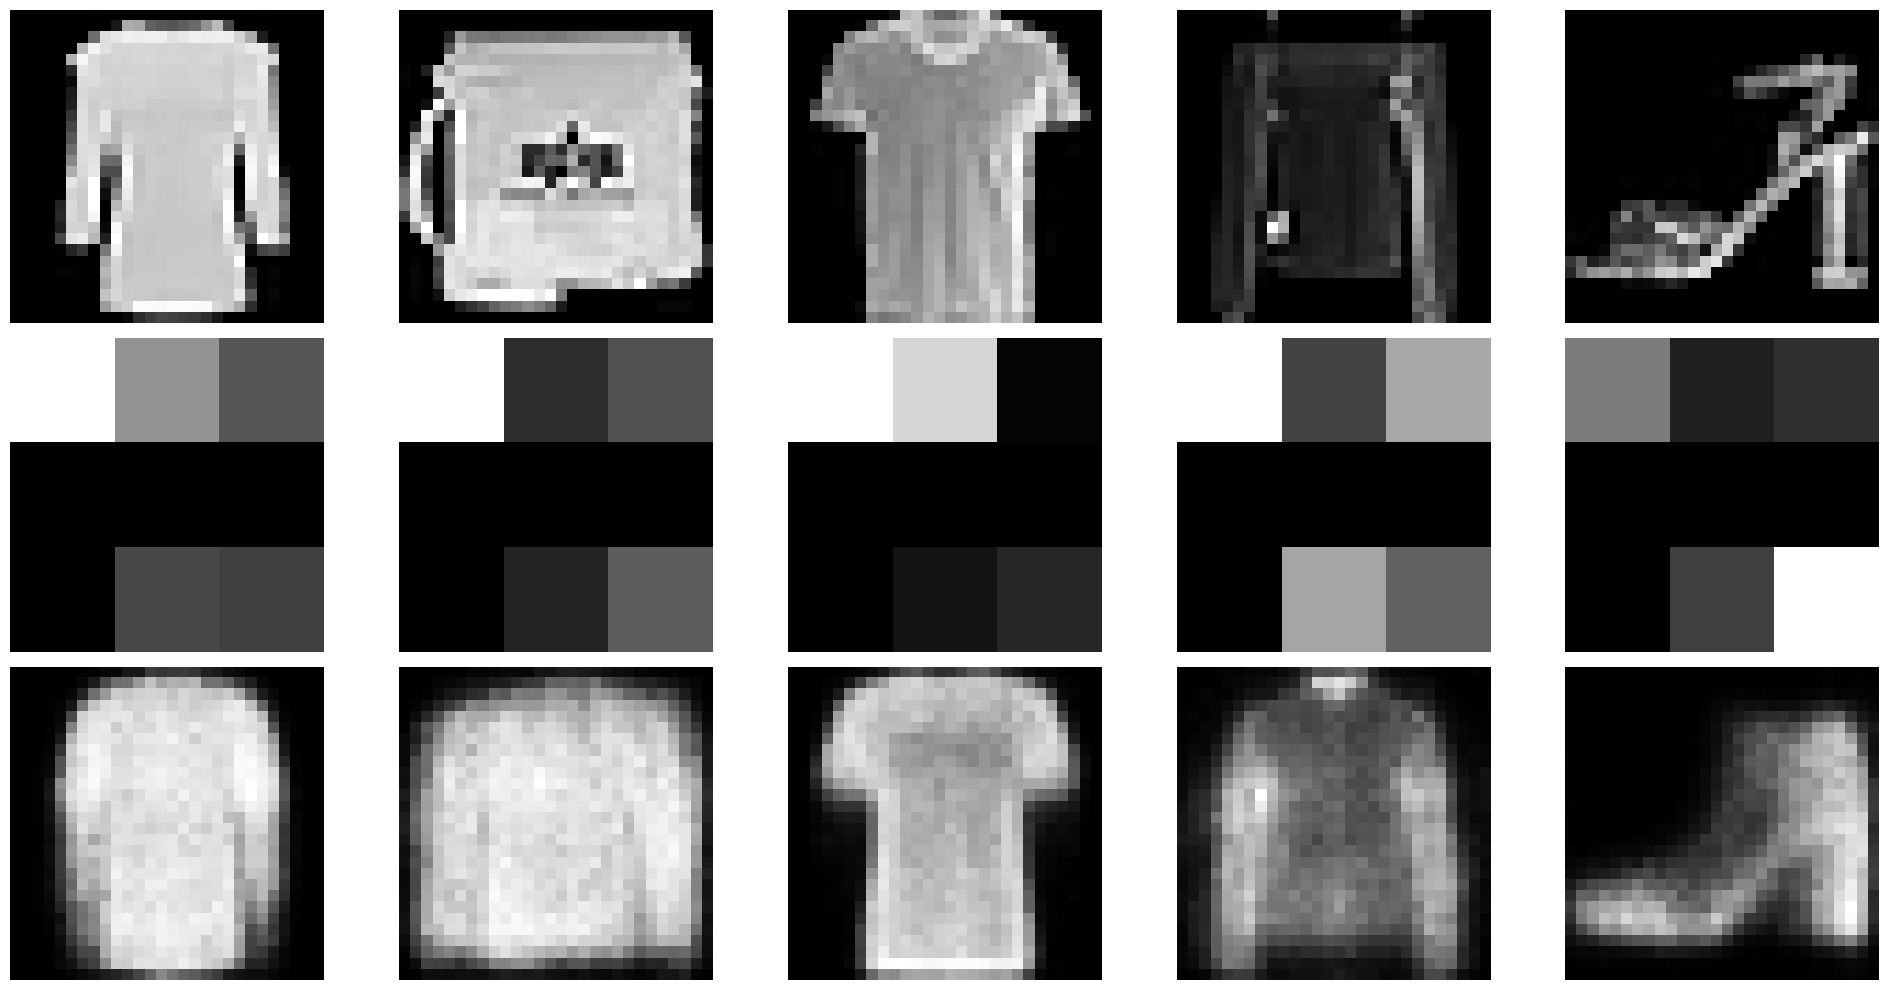

In [36]:
show_reconstructions_code(stacked_ae, X_valid, (3, 3), 5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
rows: 2, cols: 5












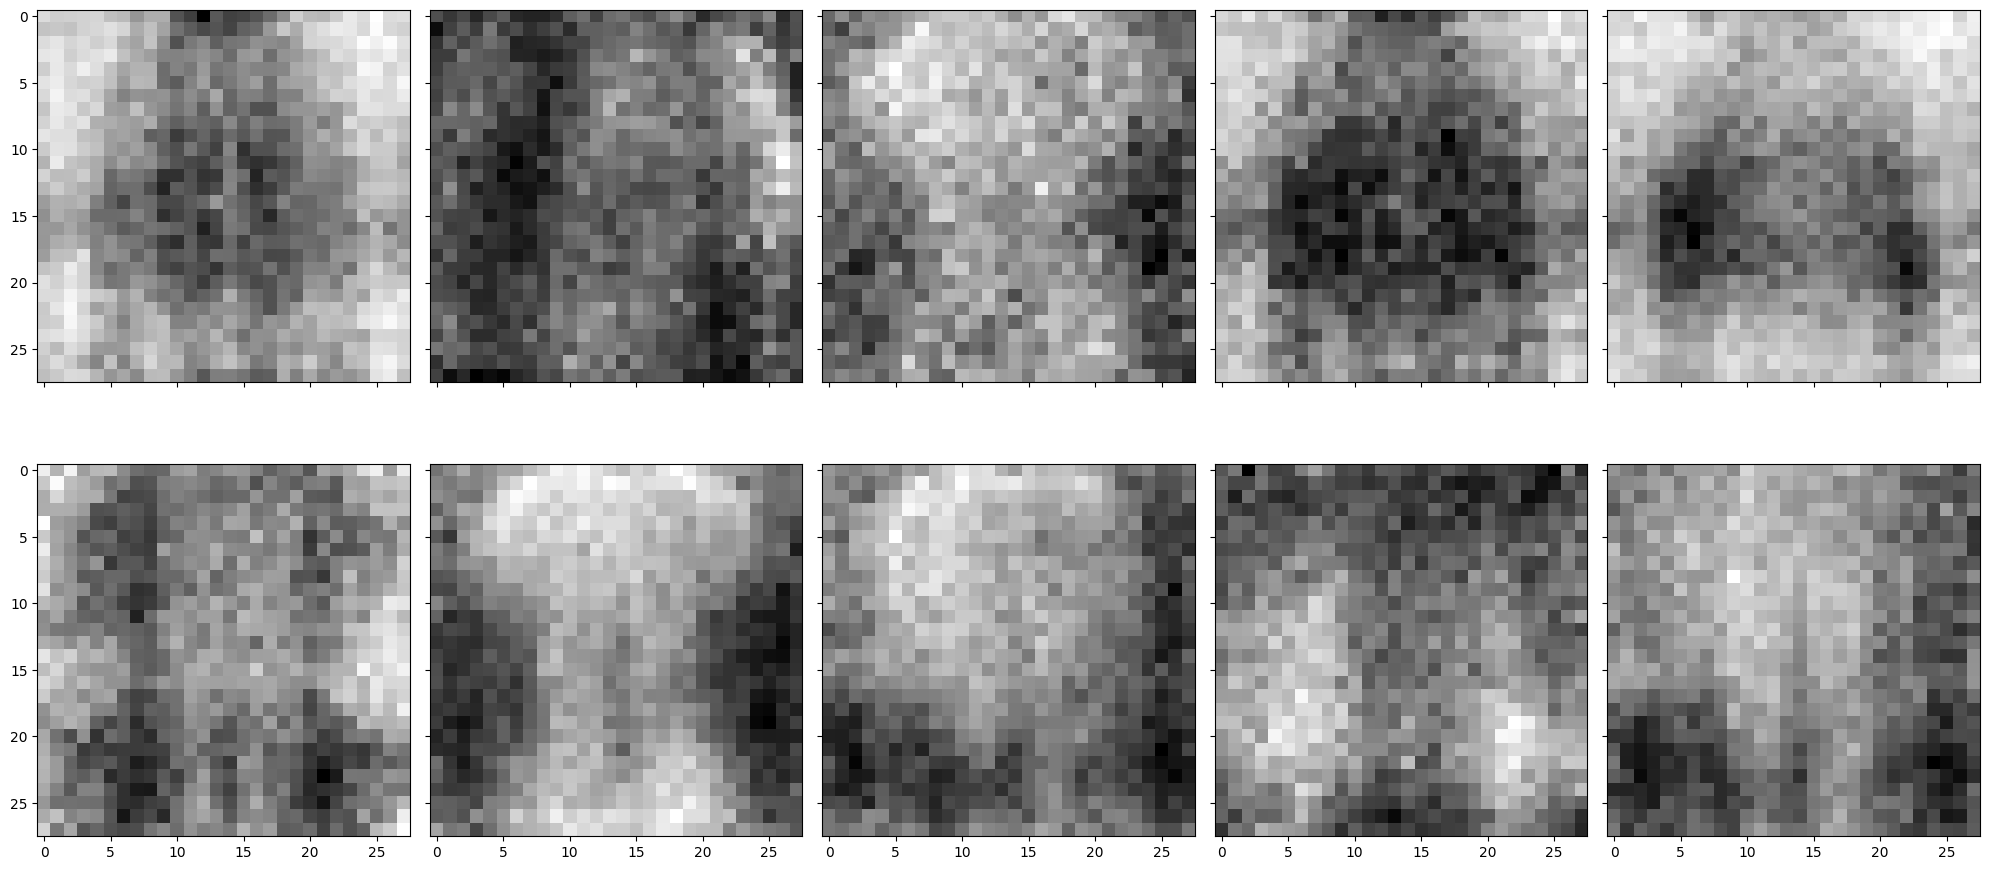

In [38]:
X_code = np.random.normal(size=(10, code_size))
images = stacked_decoder.predict(X_code)
plot_samples(images, 10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


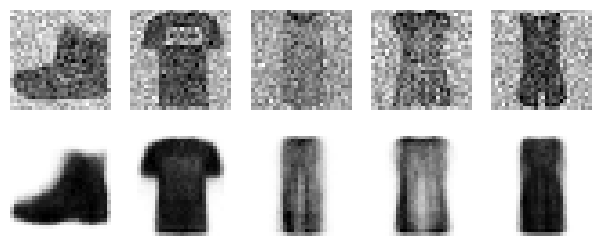

In [39]:
noise = keras.layers.GaussianNoise(0.2)
X_noise = noise(X_train, training=True).numpy()
plot_reconstructions(stacked_ae, images=X_noise[:10])

In [44]:
conv_encoder_2 = keras.models.Sequential(
        [
                keras.layers.Input(shape=[28, 28]),
                keras.layers.Reshape([28, 28, 1]),
                keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
                keras.layers.MaxPool2D(pool_size=2),
                keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
                keras.layers.MaxPool2D(pool_size=2),
                keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
                keras.layers.MaxPool2D(pool_size=2),
                keras.layers.Flatten(),
                keras.layers.Dense(code_size)
                ]
        )
conv_decoder_2 = keras.models.Sequential(
        [
                keras.layers.Dense(code_size * 64),
                keras.layers.Reshape([3, 3, 64], input_shape=[3 * 3 * 64]),
                keras.layers.Conv2DTranspose(
                        32, kernel_size=3, strides=2, padding="VALID", activation="selu",
                        input_shape=[3, 3, 64]
                        ),
                keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
                keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
                keras.layers.Reshape([28, 28])
                ]
        )
conv_ae_2 = keras.models.Sequential([conv_encoder_2, conv_decoder_2])

conv_ae_2.compile(
        loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
        metrics=[rounded_accuracy]
        )

Epoch 1/10
430/430 - 11s - 27ms/step - loss: 0.4006 - rounded_accuracy: 0.8371 - val_loss: 0.3365 - val_rounded_accuracy: 0.8863
Epoch 2/10
430/430 - 11s - 25ms/step - loss: 0.3222 - rounded_accuracy: 0.8984 - val_loss: 0.3138 - val_rounded_accuracy: 0.9089
Epoch 3/10
430/430 - 11s - 25ms/step - loss: 0.3124 - rounded_accuracy: 0.9074 - val_loss: 0.3156 - val_rounded_accuracy: 0.9065
Epoch 4/10
430/430 - 11s - 26ms/step - loss: 0.3077 - rounded_accuracy: 0.9112 - val_loss: 0.3099 - val_rounded_accuracy: 0.9118
Epoch 5/10
430/430 - 11s - 26ms/step - loss: 0.3046 - rounded_accuracy: 0.9136 - val_loss: 0.3059 - val_rounded_accuracy: 0.9152
Epoch 6/10
430/430 - 11s - 25ms/step - loss: 0.3025 - rounded_accuracy: 0.9153 - val_loss: 0.3040 - val_rounded_accuracy: 0.9168
Epoch 7/10
430/430 - 11s - 26ms/step - loss: 0.3007 - rounded_accuracy: 0.9168 - val_loss: 0.3033 - val_rounded_accuracy: 0.9170
Epoch 8/10
430/430 - 11s - 26ms/step - loss: 0.2993 - rounded_accuracy: 0.9178 - val_loss: 0.3014

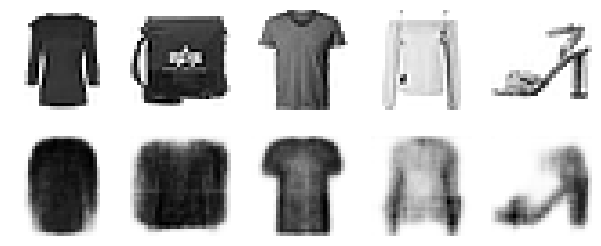

In [45]:
early_stopping = keras.callbacks.EarlyStopping(
        monitor='loss',
        min_delta=0.001, patience=2,
        mode='auto',
        verbose=True,
        restore_best_weights=True
        )
conv_ae_2.fit(
        X_train, X_train, epochs=10, validation_data=(X_valid, X_valid), verbose=2, batch_size=128,
        callbacks=[early_stopping]
        )
plot_reconstructions(conv_ae_2, images=X_valid)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


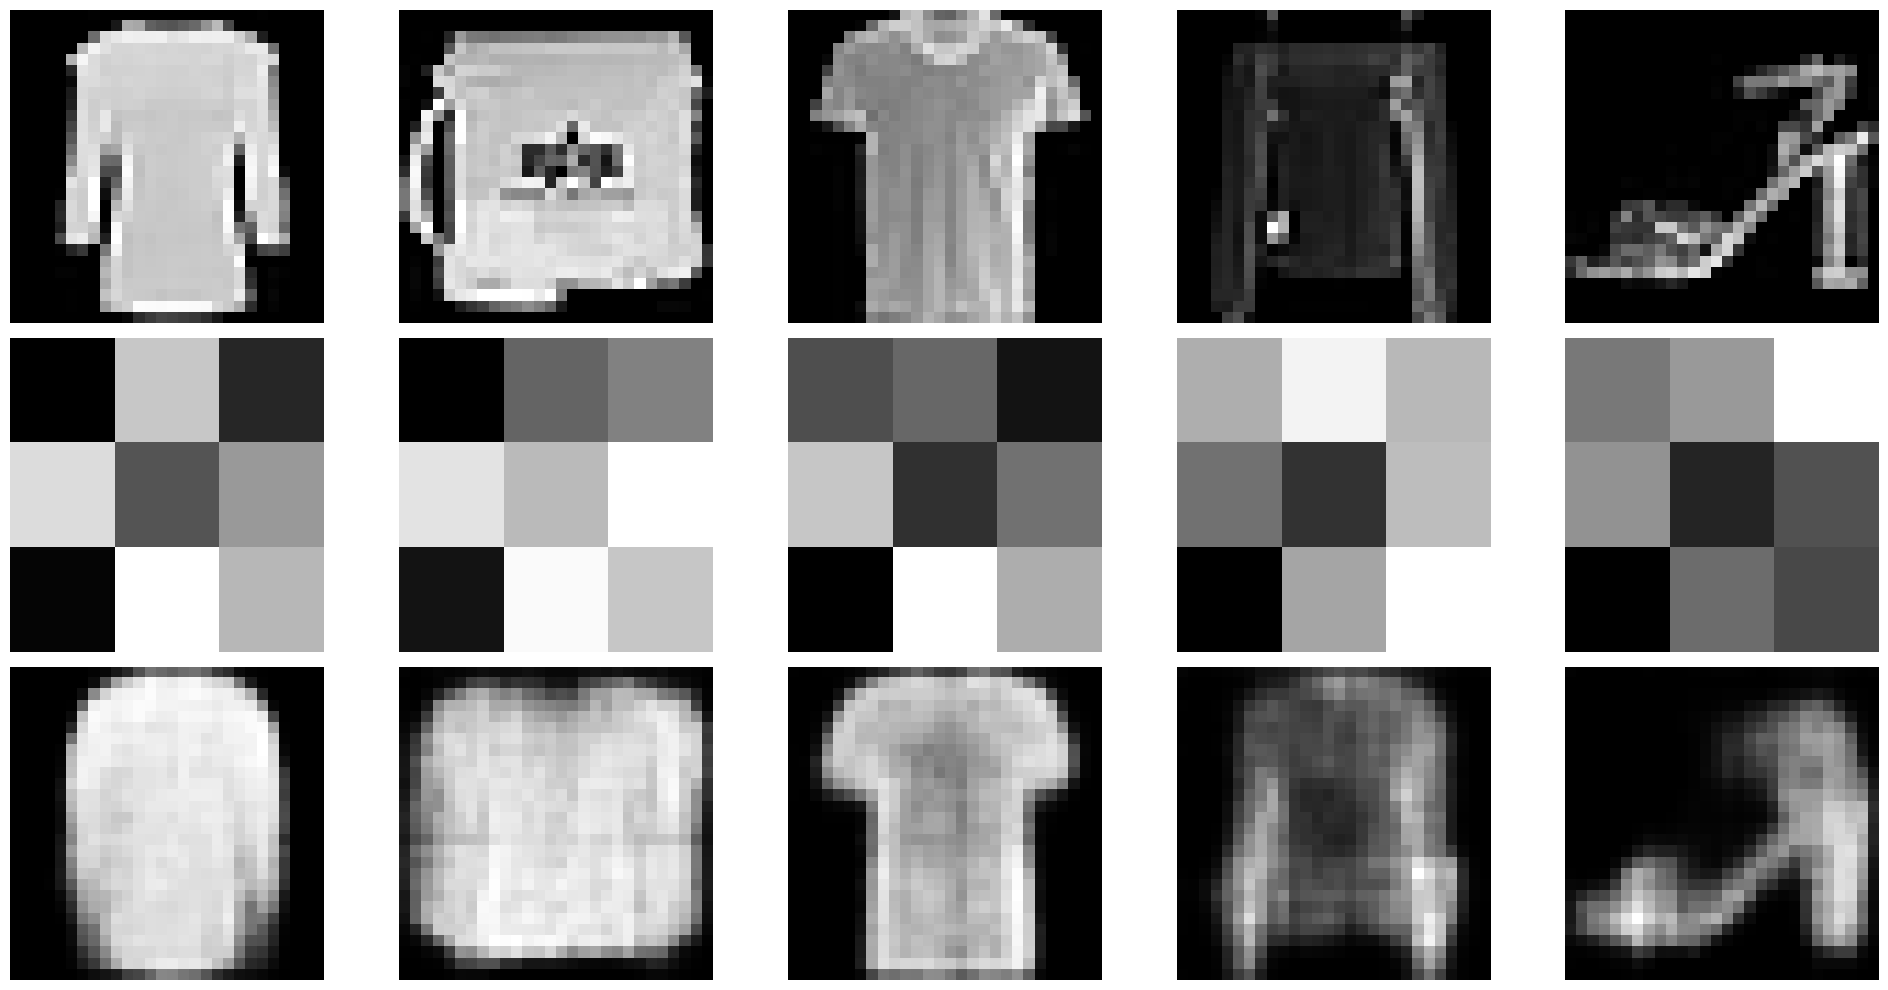

In [46]:
show_reconstructions_code(conv_ae_2, X_valid, (3, 3), 5)

1/1 [==============================] - 0s 8ms/step


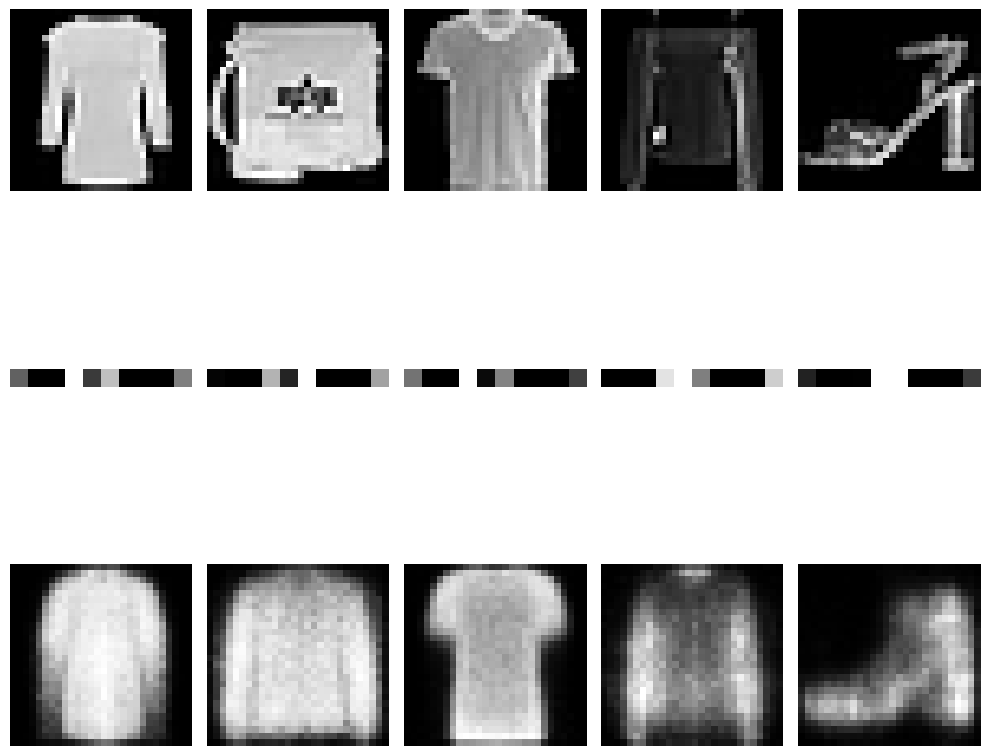

In [114]:
def show_reconstructions_code(model, images, shape, n_images=5):
    code = model.layers[0].predict(images[:n_images])
    code_images = code.reshape([n_images] + list(shape))
    reconstructed_images = model.layers[1].predict(code)
    # all_images = np.append(images, reconstructed_images, axis=0)
    all_images = [x for x in images[:n_images]]
    all_images.extend(code_images)
    all_images.extend(reconstructed_images)
    plot_images(all_images, nrows=3)


def show_code_reconstructions(decoder, codes, n_images=5, shape=None):
    code_shape = (1, codes.shape[1])
    reconstructions = decoder.predict(codes[:n_images])
    reconstructed_images = reconstructions if shape is None else reconstructions.reshape([n_images] + list(shape))
    all_images = [x.reshape(code_shape) for x in codes]
    all_images.extend(reconstructed_images)
    plot_images(all_images, nrows=2)


show_reconstructions_code(stacked_ae, X_valid, (1, 10), 5)

In [ ]:
from math import ceil


def plot_images(images, nrows=1):
    ncols = ceil(len(images) / nrows)
    fig = plt.figure(figsize=(len(images) * 1, 7))
    for image_index in range(len(images)):
        plt.subplot(nrows, ncols, 1 + image_index)
        plot_image(images[image_index])


def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")


def show_reconstructions_code(model, images, shape, n_images=5):
    code = model.layers[0].predict(images[:n_images])
    code_images = code.reshape([n_images] + list(shape))
    reconstructed_images = model.layers[1].predict(code)
    # all_images = np.append(images, reconstructed_images, axis=0)
    all_images = [x for x in images[:n_images]]
    all_images.extend(reconstructed_images)
    all_images.extend(code_images)
    plot_images(all_images, nrows=3)


def show_images_code(model, images, shape, n_images=5):
    code = model.layers[0].predict(images[:n_images])
    code_images = code.reshape([n_images] + list(shape))
    all_images = [x for x in images[:n_images]]
    all_images.extend(code_images)
    plot_images(all_images, nrows=2)
    return code


# def show_images_code(models, images, shape, n_images=5):
#     code = models.layers[0].predict(images[:n_images])
#     code_images = code.reshape([n_images] + list(shape))
#     fig = plt.figure(figsize=(n_images * 2, 7))
#     for image_index in range(n_images):
#         plt.subplot(3, n_images, 1 + image_index)
#         plot_image(images[image_index])
#         plt.subplot(2, n_images, 1 + n_images + image_index)
#         plot_image(code_images[image_index])
#     return code

def show_code_reconstructions_ae(model, codes, n_images=5, shape=None):
    show_code_reconstructions(model.layers[1], codes, n_images, shape)


def show_code_reconstructions(decoder, codes, n_images=5, shape=None):
    code_shape = (1, codes.shape[1])
    reconstructions = decoder.predict(codes[:n_images])
    reconstructed_images = reconstructions if shape is None else reconstructions.reshape([n_images] + list(shape))
    all_images = [x.reshape(code_shape) for x in codes]
    all_images.extend(reconstructed_images)
    plot_images(all_images, nrows=2)


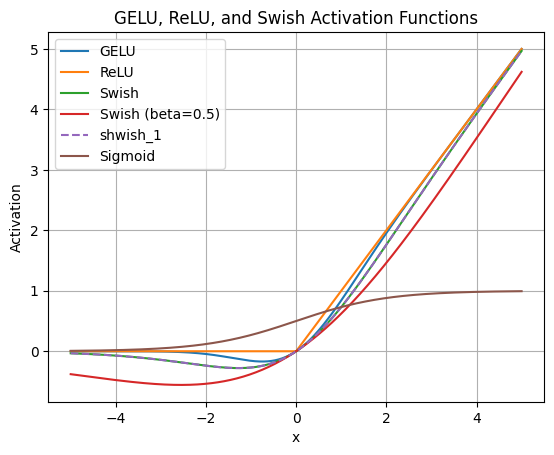

In [120]:
#https://medium.com/@jiangmen28/beyond-relu-discovering-the-power-of-swiglu-超越-relu-发现-swiglu-的力量-9dbc7d8258bf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


def gelu(x):
    return x * norm.cdf(x)


def relu(x):
    return np.maximum(0, x)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def swish(x, beta=1):
    return x * sigmoid(beta * x)


def swish1(x, beta=1):
    return x * (1 / (1 + np.exp(-beta * x)))


x_values = np.linspace(-5, 5, 500)
gelu_values = gelu(x_values)
relu_values = relu(x_values)
swish_values = swish(x_values)
swish_values2 = swish(x_values, beta=0.5)

plt.plot(x_values, gelu_values, label='GELU')
plt.plot(x_values, relu_values, label='ReLU')
plt.plot(x_values, swish_values, label='Swish')
plt.plot(x_values, swish_values2, label='Swish (beta=0.5)')
plt.plot(x_values, sigmoid(x_values), label='Sigmoid')
plt.title("GELU, ReLU, and Swish Activation Functions")
plt.xlabel("x")
plt.ylabel("Activation")
plt.grid()
plt.legend()
plt.show()